<h1> Coursera_Capstone_Project</h1>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('imported')

In [ ]:
print("Hello Capstone Project Course!")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Importing Dataset
data_df = pd.read_csv('data//data-collisions.csv', encoding='latin-1', low_memory=False)
data_df_shape_ori = data_df.shape
# print(data_df.loc[0,:])
# data_df.head(10)
print(data_df.isnull().sum(axis=0))

In [ ]:
print(data_df.dtypes)

In [ ]:
data_df['STATUS'].unique()

In [ ]:
#Check for and remove any rows with SEVERITYCODE = "0"
#Before removal get the total count of SEVERITYCODE
print("Give a run-down of the values present in the table for SEVERITYCODE:")
print(data_df["SEVERITYCODE"].value_counts())

In [ ]:
#Check for and remove any rows with SEVERITYDESC = "Unknown"
#Before removal get the total count of SEVERITYDESC
print("Give a run-down of the values present in the table for SEVERITYDESC:")
print(data_df["SEVERITYDESC"].value_counts())

In [ ]:
#drop unwanted columns

# col_set = ["SEVERITYCODE", "SEVERITYDESC", "SPEEDING","ROADCOND", "WEATHER", "ROADCOND", "LIGHTCOND", "INATTENTIONIND"]
# data_df = data_df[col_set]

drop_cols = ['OBJECTID', 'SEVERITYDESC', 'INCKEY', 'INTKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'COLLISIONTYPE', 'ADDRTYPE', 'LOCATION', 'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SDOTCOLNUM', 'SEGLANEKEY']

data_df_01 = data_df.drop(columns=drop_cols)

data_df_01.head()

In [ ]:
print(data_df_01.isnull().sum(axis=0))

In [ ]:
#Plotting counts of selected variables
descriptive_stats_plot=data_df_01[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Severity Data Count as bar plot
data_bar_set = data_df_01[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]]
color_yo=['r','grey','grey','grey','grey']
ax = data_bar_set.count().plot(kind='bar',
                                    figsize=(14,8),
                                    title="ACCIDENT COUNT", color=color_yo)
# ax.set_xlabel("SEVERITYCODE",'WEATHER')
# ax.set_ylabel("Count")
plt.show()

In [ ]:
#Find missing WEATHERCOND
# print(data_df_01["WEATHER"] == 'Unknown')
todrop1 = data_df_01["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()
print(noweatherinfo)

In [ ]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=data_df_01['ROADCOND'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [ ]:
#Find missing ROADCOND
todrop2 = data_df_01["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()
print(noroadcondinfo)

In [ ]:
#Find missing LIGHTCOND
todrop3 = data_df_01["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()
print(nolightinfo)

In [ ]:
#Collate these and remove
data_df_01["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(todrop1)):
    if todrop1[i] == True or todrop2[i] == True or todrop3[i] == True:
        data_df_01["TODROP"][i] = 1

In [ ]:
print(data_df_01["TODROP"].unique())

In [ ]:
print("There are "+str(noweatherinfo)+" accidents with no weather information.")
print("There are "+str(noroadcondinfo)+" accidents with no road condition information.")
print("There are "+str(nolightinfo)+" accidents with no information about light conditions.")
print("There are "+str(data_df_01["TODROP"].values.sum())+" accidents without one or more of the above.\n Deleting now...")

In [ ]:
#Delete the temporary column "TODROP" and re-index the data
shape0 = data_df_01.shape
todrop = data_df_01["TODROP"] == 1
data_df_01.drop(data_df_01.index[todrop], inplace=True)

In [ ]:
#Print info about DF shape before and after
print("Shape of DF before: "+str(shape0[0])+" x "+str(shape0[1]))
print("Shape of DF after: "+str(data_df_01.shape[0])+" x "+str(data_df_01.shape[1]))
print("The original DF had shape: "+str(data_df_shape_ori[0])+" x "+str(data_df_shape_ori[1]))

#Re-index dataframe to account for missing rows
data_df_01.reset_index(inplace=True)

In [ ]:
#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in data_df_01:
    del data_df_01["TODROP"]
    del data_df_01["index"]

In [ ]:
#Both SEVERITYCODE & SEVERITYDESC count should match
print(data_df_01["SEVERITYCODE"].value_counts())
print(data_df_01["SEVERITYDESC"].value_counts())

In [ ]:
#Know the Speeding existing values and set them to numeric 0 & 1
data_df_01["SPEEDING"].unique()

In [ ]:
#set speeding values [nan, 'Y'] to numeric 0 & 1
data_df_01["SPEEDING"].replace(np.nan, 0, inplace=True)
data_df_01["SPEEDING"].replace("Y", 1, inplace=True)
data_df_01["SPEEDING"].unique()

In [ ]:
#Know the INATTENTIONIND existing values and set them to numeric 0 & 1
data_df_01["INATTENTIONIND"].unique()

In [ ]:
#set INATTENTIONIND values [nan, 'Y'] to numeric 0 & 1
data_df_01["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
data_df_01["INATTENTIONIND"].replace("Y", 1, inplace=True)
data_df_01["INATTENTIONIND"].unique()

In [ ]:
#Know the UNDERINFL existing values and set them to numeric 0 & 1
data_df_01["UNDERINFL"].unique()

In [ ]:
# Set UNDERINFL values ['N', '0', nan, '1', 'Y'] to numeric 0, 1, 1
data_df_01["UNDERINFL"].replace(np.nan, 0, inplace=True)
data_df_01["UNDERINFL"].replace('N', 0, inplace=True)
data_df_01["UNDERINFL"].replace('0', 0, inplace=True)
data_df_01["UNDERINFL"].replace('1', 1, inplace=True)
data_df_01["UNDERINFL"].replace("Y", 1, inplace=True)
data_df_01["UNDERINFL"].unique()

In [ ]:
#PEDROWNOTGRNT & HITPARKEDCAR
data_df_01["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
data_df_01["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

data_df_01["HITPARKEDCAR"].replace("N", 0, inplace=True)
data_df_01["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
data_df_01["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [ ]:
# Know more about LIGHTCOND
data_df_01['LIGHTCOND'].describe()
data_df_01['LIGHTCOND'].value_counts()

In [ ]:
# Know more about WEATHER
data_df_01['WEATHER'].describe()
data_df_01['WEATHER'].value_counts()

In [ ]:
# Know more about ROADCOND
data_df_01['ROADCOND'].describe()
data_df_01['ROADCOND'].value_counts()

In [ ]:
# Know more about ADDRTYPE
data_df_01['ADDRTYPE'].describe()
data_df_01['ADDRTYPE'].value_counts()

In [213]:
#Get dummies for one-hot encoding
weatherdummies = pd.get_dummies(data_df_01["WEATHER"])
lightconddummies = pd.get_dummies(data_df_01["LIGHTCOND"])
roadconddummies = pd.get_dummies(data_df_01["ROADCOND"])
# weatherdummies.head()
lightconddummies.head()
# roadconddummies.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [214]:
#There is an "other" column in each of the above DFs -- rename these to avoid confusion
#when the DataFrames are merged
weatherdummies.rename(columns={"Other": "OtherWeather"}, inplace=True)
lightconddummies.rename(columns={"Other": "OtherLight"}, inplace=True)
roadconddummies.rename(columns={"Other": "OtherRoadcond"}, inplace=True)
# weatherdummies.head()
lightconddummies.head()
# roadconddummies.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,OtherLight,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [215]:
#Lets have a look at the current state of the df
data_df_01.head()

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N


In [216]:
#Now use one-hot encoding on SDOT_COLCODE
colcodedummies = pd.get_dummies(data_df_01["SDOT_COLCODE"])
columns = colcodedummies.columns
for col in columns:
    colcodedummies = colcodedummies.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

In [217]:
#Lets have a look at the current state of the df
data_df_01.head()

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N


In [218]:
#Join columns to existing DataFrame
#data_frames = [df, weatherdummies, lightconddummies, roadconddummies, addrtypedummies]
data_df_01 = data_df_01.join(weatherdummies)
data_df_01 = data_df_01.join(lightconddummies)
data_df_01 = data_df_01.join(roadconddummies)
data_df_01 = data_df_01.join(addrtypedummies)
data_df_01 = data_df_01.join(colcodedummies)

ValueError: columns overlap but no suffix specified: Index(['Unknown'], dtype='object')

In [219]:
print(colcodedummies.shape)
colcodedummies.head(5)

(194673, 39)


,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:

#Separate Date/Time from INCDTTM colum and create columns for Hour/Minute, Day/Month/Year
data_df_01["INC_DATE_TIME"] = pd.to_datetime(data_df_01["INCDTTM"])
data_df_01["MONTH"] = pd.DatetimeIndex(data_df_01["INC_DATE_TIME"]).month
data_df_01["DAY_OF_WEEK"] = data_df_01["INC_DATE_TIME"].dt.dayofweek
data_df_01["DAY_OF_MONTH"] = pd.DatetimeIndex(data_df_01["INC_DATE_TIME"]).day
data_df_01["YEAR"] = pd.DatetimeIndex(data_df_01["INC_DATE_TIME"]).year


In [159]:
data_df_01.head(5)

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,OtherWeather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,OtherLight,Dry,Ice,Oil,OtherRoadcond,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Alley,Block,Intersection,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-27 14:54:00,3,2,27,2013
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-12-20 18:55:00,12,2,20,2006
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-11-18 10:20:00,11,3,18,2004
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-29 09:26:00,3,4,29,2013
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-01-28 08:04:00,1,2,28,2004


In [160]:
import time
from datetime import datetime, timedelta
import concurrent.futures
import multiprocessing
from tqdm.auto import tqdm, trange
num_processes = multiprocessing.cpu_count()

print("There are "+str(num_processes)+" logical cores on this system.")
global_starttime = time.time()

#Create new columns
data_df_01["TIME_ROUNDED_TO_NEAREST_HOUR"] = 0
data_df_01["DAY_STRING"] = 0
data_df_01["MONTH_STRING"] = 0
data_df_01["WEEKEND"] = 0

There are 8 logical cores on this system.


In [161]:
data_df_01.head()

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,OtherWeather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,OtherLight,Dry,Ice,Oil,OtherRoadcond,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Alley,Block,Intersection,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,TIME_ROUNDED_TO_NEAREST_HOUR,DAY_STRING,MONTH_STRING,WEEKEND
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-27 14:54:00,3,2,27,2013,0,0,0,0
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-12-20 18:55:00,12,2,20,2006,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-11-18 10:20:00,11,3,18,2004,0,0,0,0
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-29 09:26:00,3,4,29,2013,0,0,0,0
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-01-28 08:04:00,1,2,28,2004,0,0,0,0


In [162]:
print(data_df_01.shape[0])

175771


In [164]:
#Define some useful functions
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

def get_dow(day_int):
    if day_int == 0:
        dow = 'Mon'
    if day_int == 1:
        dow = 'Tue'
    if day_int == 2:
        dow = 'Wed'
    if day_int == 3:
        dow = 'Thu'
    if day_int == 4:
        dow = 'Fri'
    if day_int == 5:
        dow = 'Sat'
    if day_int == 6:
        dow = 'Sun'
    return dow

def get_month(month_int):
    if month_int == 1:
        monthstring = 'Jan'
    if month_int == 2:
        monthstring = 'Feb'
    if month_int == 3:
        monthstring = 'Mar'
    if month_int == 4:
        monthstring = 'Apr'
    if month_int == 5:
        monthstring = 'May'
    if month_int == 6:
        monthstring = 'Jun'
    if month_int == 7:
        monthstring = 'Jul'
    if month_int == 8:
        monthstring = 'Aug'
    if month_int == 9:
        monthstring = 'Sep'
    if month_int == 10:
        monthstring = 'Oct'
    if month_int == 11:
        monthstring = 'Nov'
    if month_int == 12:
        monthstring = 'Dec'
    return monthstring
     
def is_weekend(day_int):
    if day_int <= 4:
        isweekend = 0
    else:
        isweekend = 1
    return isweekend

start_time = time.time()
#Get the day of the week from its integer value (0-6)
print("Get the day of the week from its integer value (0-6):")
def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
        data_df_01["DAY_STRING"] = list(tqdm(pool.map(get_dow, data_df_01["DAY_OF_WEEK"], chunksize=10), total=data_df_01.shape[0]))

    #Get the name of the month from its integer value (1-12)
    print("Get the name of the month from its integer value (1-11):")
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
        data_df_01["MONTH_STRING"] = list(tqdm(pool.map(get_month, data_df_01["MONTH"], chunksize=10), total=data_df_01.shape[0]))
    
    #Round time to the nearest whole hour
    print("Round time to the nearest whole hour:")
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
        data_df_01["TIME_ROUNDED_TO_NEAREST_HOUR"] = list(tqdm(pool.map(hour_rounder, data_df_01["INC_DATE_TIME"], chunksize=10), total=data_df_01.shape[0]))
    
    #Check if an accident occurred on the weekend or not
    print("Check if an accident occurred on the weekend or not:")
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
        data_df_01["WEEKEND"] = list(tqdm(pool.map(is_weekend, data_df_01["DAY_OF_WEEK"], chunksize=10), total=data_df_01.shape[0]))

    elapsed_time = time.time() - start_time
    print("Elapsed time for parallel FOR loop (seconds): "+str(elapsed_time))

    #Now store the nearest hour to the time of the accident as an integer and delete the rounded Datetime
    data_df_01["HOUR_NEAREST"] = pd.DatetimeIndex(data_df_01["TIME_ROUNDED_TO_NEAREST_HOUR"]).hour
    
    del data_df_01["TIME_ROUNDED_TO_NEAREST_HOUR"]

if __name__ == '__main__':
    main()

Get the day of the week from its integer value (0-6):



Get the name of the month from its integer value (1-11):



Round time to the nearest whole hour:



Check if an accident occurred on the weekend or not:



Elapsed time for parallel FOR loop (seconds): 37.49662113189697


In [165]:
# data_df_01.head(5)

In [166]:
#Check the dataframe for any NaNs
print(data_df_01.isnull().sum(axis=0))

ï»¿SEVERITYCODE                  0
X                             3964
Y                             3964
SEVERITYCODE                     0
PERSONCOUNT                      0
PEDCOUNT                         0
PEDCYLCOUNT                      0
VEHCOUNT                         0
INCDTTM                          0
SDOT_COLCODE                     0
INATTENTIONIND              147089
UNDERINFL                     4884
WEATHER                       5067
ROADCOND                      4995
LIGHTCOND                     5121
PEDROWNOTGRNT               171278
SPEEDING                    166615
CROSSWALKKEY                     0
HITPARKEDCAR                     0
Blowing Sand/Dirt                0
Clear                            0
Fog/Smog/Smoke                   0
OtherWeather                     0
Overcast                         0
Partly Cloudy                    0
Raining                          0
Severe Crosswind                 0
Sleet/Hail/Freezing Rain         0
Snowing             

In [167]:
##Missing geographical data
#Find null values and replace these with NaN
#Find NaNs and set these to spaces.
print("There are "+str(data_df_01["X"].isnull().sum())+" null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.")

#Go through the accidents with no X,Y data and see if we can match them to others
#that share the same INTKEY
data_df_01["NOT_HAS_COORDS"] = data_df_01["X"].isnull()
count = 0
for i in range(0,len(data_df_01["X"])):
    if data_df_01["NOT_HAS_COORDS"][i] == True:
        if data_df_01["INTKEY"][i] > 0:
            #Find other accidents which share the same INTKEY
            matched_intersections = data_df_01.loc[data_df_01["INTKEY"] == data_df_01["INTKEY"][i]]
            #Do any of these have the required X,Y data?
            with_geodata = matched_intersections["X"].count()
            if with_geodata > 0:
                matched_intersections.head()
                count += 1

if "NOT_HAS_COORDS" in data_df_01:
    del data_df_01["NOT_HAS_COORDS"]
    
print("Added locations for "+str(count)+" accidents based on shared INTKEYS.")

There are 3964 null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.


KeyError: 'INTKEY'

In [168]:
data_df_01.head(5)

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,OtherWeather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,OtherLight,Dry,Ice,Oil,OtherRoadcond,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Alley,Block,Intersection,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,DAY_STRING,MONTH_STRING,WEEKEND,HOUR_NEAREST,NOT_HAS_COORDS
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-27 14:54:00,3,2,27,2013,Wed,Mar,0,15,False
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-12-20 18:55:00,12,2,20,2006,Wed,Dec,0,19,False
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-11-18 10:20:00,11,3,18,2004,Thu,Nov,0,10,False
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-29 09:26:00,3,4,29,2013,Fri,Mar,0,9,False
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-01-28 08:04:00,1,2,28,2004,Wed,Jan,0,8,False


In [169]:
#Keep the full dataframe, but create a copy which drops columns which will not be used for modelling
data = data_df_01.copy()
if 'INTKEY' in data_df_01:
    del data["INTKEY"]
    del data["ADDRTYPE"]
    del data["LOCATION"]
    del data["SEVERITYDESC"]
    del data["COLLISIONTYPE"]
    del data["INCDTTM"]
    del data["JUNCTIONTYPE"]
    del data["SDOT_COLDESC"]

In [170]:
data.head(5)

,ï»¿SEVERITYCODE,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,OtherWeather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,OtherLight,Dry,Ice,Oil,OtherRoadcond,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Alley,Block,Intersection,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,DAY_STRING,MONTH_STRING,WEEKEND,HOUR_NEAREST,NOT_HAS_COORDS
0,2,-122.323148,47.703140,2,2,0,0,2,3/27/2013 2:54:00 PM,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-27 14:54:00,3,2,27,2013,Wed,Mar,0,15,False
1,1,-122.347294,47.647172,1,2,0,0,2,12/20/2006 6:55:00 PM,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-12-20 18:55:00,12,2,20,2006,Wed,Dec,0,19,False
2,1,-122.334540,47.607871,1,4,0,0,3,11/18/2004 10:20:00 AM,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-11-18 10:20:00,11,3,18,2004,Thu,Nov,0,10,False
3,1,-122.334803,47.604803,1,3,0,0,3,3/29/2013 9:26:00 AM,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-03-29 09:26:00,3,4,29,2013,Fri,Mar,0,9,False
4,2,-122.306426,47.545739,2,2,0,0,2,1/28/2004 8:04:00 AM,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-01-28 08:04:00,1,2,28,2004,Wed,Jan,0,8,False


In [171]:
print("The shape of the dataframe is:")
print(data.shape)

The shape of the dataframe is:
(175771, 97)


In [172]:
print("The data types are:")
data.dtypes

The data types are:


ï»¿SEVERITYCODE                      int64
X                                  float64
Y                                  float64
SEVERITYCODE                         int64
PERSONCOUNT                          int64
PEDCOUNT                             int64
PEDCYLCOUNT                          int64
VEHCOUNT                             int64
INCDTTM                             object
SDOT_COLCODE                         int64
INATTENTIONIND                      object
UNDERINFL                           object
WEATHER                             object
ROADCOND                            object
LIGHTCOND                           object
PEDROWNOTGRNT                       object
SPEEDING                            object
CROSSWALKKEY                         int64
HITPARKEDCAR                        object
Blowing Sand/Dirt                    uint8
Clear                                uint8
Fog/Smog/Smoke                       uint8
OtherWeather                         uint8
Overcast   

In [173]:
print("Here is a count of how many null/NaN values there are in each column:")
print(data.isnull().sum(axis=0))

Here is a count of how many null/NaN values there are in each column:
ï»¿SEVERITYCODE                  0
X                             3964
Y                             3964
SEVERITYCODE                     0
PERSONCOUNT                      0
PEDCOUNT                         0
PEDCYLCOUNT                      0
VEHCOUNT                         0
INCDTTM                          0
SDOT_COLCODE                     0
INATTENTIONIND              147089
UNDERINFL                     4884
WEATHER                       5067
ROADCOND                      4995
LIGHTCOND                     5121
PEDROWNOTGRNT               171278
SPEEDING                    166615
CROSSWALKKEY                     0
HITPARKEDCAR                     0
Blowing Sand/Dirt                0
Clear                            0
Fog/Smog/Smoke                   0
OtherWeather                     0
Overcast                         0
Partly Cloudy                    0
Raining                          0
Severe Crosswind    

In [174]:
import folium

#Get the median latitude and logitude and centre the map there
lon_med = data["X"].mean()
lat_med = data["Y"].mean()

print(lat_med)
print(lon_med)

seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map



47.618959790793774
-122.33036557514542


In [104]:
import pyscreenshot as ImageGrab
from selenium import webdriver
im=ImageGrab.grab()
im.save('map1_seattle.png', format='png')
im=ImageGrab.grab(bbox=(500,250,1480,830))

In [105]:
#Read the Seattle geojson data
import json
import requests

#GeoJSON file obtained from https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson
#!wget https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson
geofile = 'data//neighborhoods.geojson'

with open(geofile) as json_file:
    geodata = json.load(json_file)

print("There are "+str(len(geodata['features']))+" districts in the Seattle area:")

There are 175 districts in the Seattle area:


In [106]:
!pip install shapely

In [3]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [4]:
#Convert latitude/longitude to point objects and find out which area they lie in
from shapely.geometry import shape, Point, Polygon
from shapely.ops import nearest_points
from time import strftime, gmtime
import random

    
def find_county(lon, lat):
    point = Point(lon, lat)
    found_nhood = 0
    '''Most accidents can be trivially located within a neighbourhood
       using the polygon.contains() function from shapely
    '''
    for i in range(0,len(geodata['features'])):
        polygon = shape(geodata['features'][i]['geometry'])
    if polygon.contains(point):
            nhood = geodata['features'][i]['properties']['name']
            found_nhood = 1
    if found_nhood == 2:
        '''Some accidents can't be located within neighbourhoods because
           they occur on major highways which mark neighbourhood boundaries:
           the "no man's land" problem. Let's deal with these by assigning
           them to the _nearest_ neighbourhood
        '''
        nhoods = []
        distances = np.zeros(len(geodata['features']))
        for i in range(0,len(geodata['features'])):
            polygon = shape(geodata['features'][i]['geometry'])
            distances[i] = point.distance(polygon)
            nhoods.append(geodata['features'][i]['properties']['name'])
            
        min_distance = np.where(distances == np.amin(distances)) 
        try:
            #Usually this finds the nearest district
            min_distance_index = int(min_distance[0])
        except:
            '''But sometimes the accident is exactly equidistant between
               two neighbourhood boundaries. In this case, choose one
               of the districts at random to avoid biasing the sample
            '''
            min_distance_index = int(random.choice(min_distance[0]))
        nhood = nhoods[min_distance_index]
        found_nhood = 1
        if found_nhood == 0:
            sys.exit("I'm sorry I can't do that Dave...")
    return nhood
    
start_time = time.time()

from tqdm.auto import tqdm, trange
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
    data["NEIGHBOURHOOD"] = list(tqdm(pool.map(find_county, data['X'], data['Y'], chunksize=10), total=data_df_01.shape[0]))
    
        
elapsed_time = time.time() - start_time
print("Multi-thread elapsed time: "+str(strftime("%H:%M:%S", gmtime(elapsed_time))))

NameError: name 'time' is not defined

In [2]:
print("There are "+str(data["NEIGHBOURHOOD"].isnull().sum())+" accidents with no neighbourhood information")
print("The number of accidents in each neighbourhood is as follows:")
data["NEIGHBOURHOOD"].value_counts()

NameError: name 'data' is not defined

In [ ]:
#Now count how many accidents there are in each neighbourhood
accidents_per_nhood = pd.DataFrame(data["NEIGHBOURHOOD"].value_counts())
accidents_per_nhood.reset_index(inplace=True)
accidents_per_nhood.rename(columns = {'NEIGHBOURHOOD':"COUNT"}, inplace=True)
accidents_per_nhood.rename(columns = {'index':"NEIGHBOURHOOD"}, inplace=True)

#Also calculate the average severity of accidents in each area for later
temp_df = data.groupby(['NEIGHBOURHOOD']).mean()
temp_df.reset_index(inplace=True)
accidents_per_nhood["MEAN_SEVERITY"] = 0.0
for i in range(0,len(accidents_per_nhood["NEIGHBOURHOOD"])):
    for j in range(0,len(temp_df["X"])):
        if accidents_per_nhood["NEIGHBOURHOOD"][i] == temp_df["NEIGHBOURHOOD"][j]:
            accidents_per_nhood["MEAN_SEVERITY"][i] = temp_df["SEVERITYCODE"][j]

accidents_per_nhood.head(5)

In [ ]:
print(folium.__version__)

#Now use the geojson data and create a choropleth map
threshold_scale = np.linspace(accidents_per_nhood['COUNT'].min(),
                              accidents_per_nhood['COUNT'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# generate choropleth map using the accident data
seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map.choropleth(
    geo_data=geodata,
    data=accidents_per_nhood,
    columns=['NEIGHBOURHOOD', 'COUNT'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    nan_line_opacity=0.0,
    legend_name='N accidents per neighbourhood',
    reset=True
)

# display map
seattle_map

In [ ]:
#Accident severity map
threshold_scale = np.linspace(accidents_per_nhood['MEAN_SEVERITY'].min(),
                              accidents_per_nhood['MEAN_SEVERITY'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

#Generate a choropleth map of the mean accident severity in each neighbourhood
seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map.choropleth(
    geo_data=geodata,
    data=accidents_per_nhood,
    columns=['NEIGHBOURHOOD', 'MEAN_SEVERITY'],
    key_on='feature.properties.name',
    #threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    nan_line_opacity=0.0,
    legend_name='Average severity code of accidents',
    reset=True
)

# display map
seattle_map

In [ ]:
#Import Matplotlib and prepare inline plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

#Set up gpplot style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [ ]:
#A reminder of what columns are in the dataset:
data_df_01.head(5)

In [ ]:
data_df_01["ADDRTYPE"].value_counts()

In [ ]:
data_df_01['COLLISIONTYPE'] = data_df_01.fillna({"COLLISIONTYPE":"other"})


# data_df_01.fillna({"COLLISIONTYPE":"other"})

# # collisiontype_data = pd.DataFrame(data_df_01["COLLISIONTYPE"].value_counts())
# data_df_01["COLLISIONTYPE"].reset_index(inplace=True)

# # data_df_01["COLLISIONTYPE"].isnull().sum()
# # from tqdm.auto import tqdm, trange
# with concurrent.futures.ThreadPoolExecutor(max_workers=5) as pool:
#     data_df_01["COLLISIONTYPE"] = list(tqdm(pool.map(data_df_01.fillna({"COLLISIONTYPE":"other"}), chunksize=10), total=30))
    

In [ ]:
data_df_01["COLLISIONTYPE"].isnull().sum()

In [ ]:
data_df_01['X'].mean

There are 175771 entries in df currently.


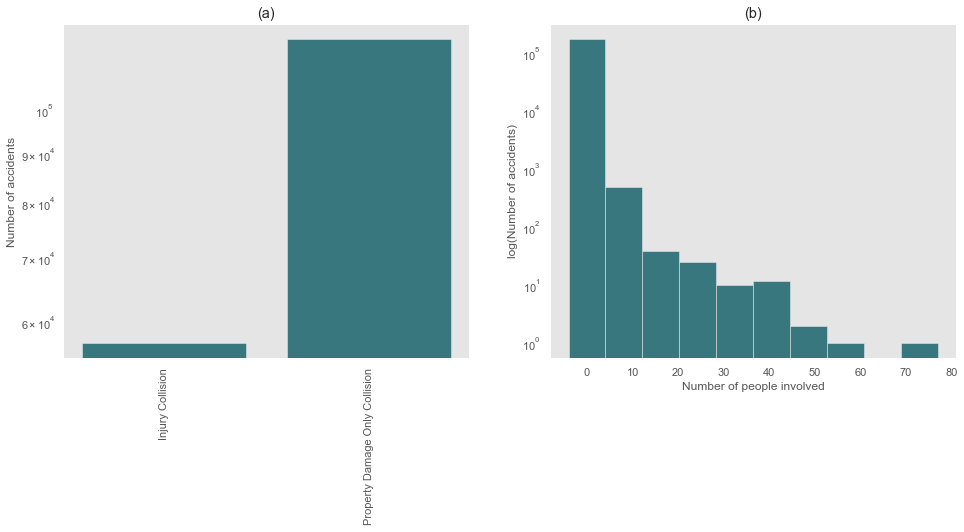

In [120]:
print("There are "+str(len(data_df_01))+" entries in df currently.")

#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(data_df_01["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(data_df_01["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(data_df_01["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')


plt.subplots_adjust(hspace=0.6)

In [ ]:
# We assign new values to roadcond
data_df['ROADCOND'].replace(to_replace=['Wet','Dry','Unknown','Snow/Slush','Ice','Other','Sand/Mud/Dirt','Standing Water','Oil'], value = ['Dangerous','Normal','Normal','Dangerous','Dangerous','Normal','Dangerous','Dangerous','Dangerous'], inplace=True)
